### 0729 선생님 코드

In [ ]:
#124수, 1~100까지수를 124수로 변경 
def otf(q):
    n=""
    reminder='412'
    while q:
        q,r=divmod(q,3)
        print(q,r)
        #q를 3으로 나눈 몫과 나머지를 각각 q,r로 저장
        n=reminder[r]+n
        if not r:
            q -=1
    return n

if __name__=="__main__":
    end=int(input("enter last number>>"))
    for i in range(1,end+1):
        print(" :%d ==>124 %s"%(i,otf(i)))

### 내가 작성한 코드

In [ ]:
def printcenter(s):
    if len(s)%2==0:
        return s[(len(s)//2)-1:(len(s)//2)+1]
    else:
        return s[len(s)//2]
    
if __name__=="__main__":
    s=input("enter string>>")
    print("{}, {}".format(s,printcenter(s)))

In [ ]:
def sumdice(n):
    r=[]
    for i in range(1,7):
        if n-i<=6 and n-i>0:
            r.append([i,n-i])
    return r        

if __name__=="__main__":
    n=int(input("enter special dice sum_num >>"))
    print("[{}, {}]".format(len(sumdice(n)),sumdice(n)))

# 데이터분석 실습

In [6]:
import pandas as pd
import numpy as np
import math

In [7]:
df = pd.DataFrame({
'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
'price': [100, 200, 250, 300, 150, 200, 400],
'quantity': [1, 2, 3, 4, 5, 6, 7]
})

In [8]:
df.groupby('city').mean()

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [9]:
df.groupby(['city', 'fruits']).mean() 

price  quantity
city fruits                 
부산   apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울   apple   175.0       5.5
     banana  400.0       7.0

In [10]:
df.groupby('city').get_group('부산')

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4


# 교재 실습 p.43

# 주문 데이터 실습

In [11]:
file_path =  './Downloads/chipotle.tsv'
# 'C:/Users/Playdata/Downloads/chipotle.tsv'# ../2020_엔코어/analysis

chipo = pd.read_csv(file_path, sep='\t')
print(chipo.shape)
print('='*40)
chipo.info()

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [12]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [13]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# (참고) average(), apply()

In [14]:
data = np.arange(1,6)
weight = np.arange(0.5,0,-0.1)
print(np.average(data))
print(np.average(data,weights=weight))

3.0
2.333333333333333


In [15]:
df = pd.DataFrame({'국어': [90,88,92],
'수학':[87, 90, 95],
'영어':[94,86, 89]}, index=['고길동','김둘리','이하늬'])
def score(df):
    return math.ceil((df['수학']+df['영어']+df['국어'])/3)
print(df.head())
#모든 점수에 +5를 하고 싶은 때
df.apply(lambda x: x+5)
print(df.apply(lambda x: x+5))
# 과목별 평균을 구하는 경우
print("\n")
print(df.apply(np.mean, axis=0))
#학생별 평균을 구하는 경우
print("\n")
print(df.apply(np.average, axis=1))

#사용자 정의 함수를 이용한 각 학생들의 두 과목의 평균 구하기
df['평균'] = df.apply(score,axis=1)
print(df.head())

     국어  수학  영어
고길동  90  87  94
김둘리  88  90  86
이하늬  92  95  89
     국어   수학  영어
고길동  95   92  99
김둘리  93   95  91
이하늬  97  100  94


국어    90.000000
수학    90.666667
영어    89.666667
dtype: float64


고길동    90.333333
김둘리    88.000000
이하늬    92.000000
dtype: float64
     국어  수학  영어  평균
고길동  90  87  94  91
김둘리  88  90  86  88
이하늬  92  95  89  92


In [16]:
s = df['국어'].map(np.mean)
s

고길동    90.0
김둘리    88.0
이하늬    92.0
Name: 국어, dtype: float64

## 전처리 : 순서가 의미없는 'order_id' 문자열로, 'item_price' 달러싸인 빼고 float형으로

In [17]:
chipo['order_id'] = chipo['order_id'].astype(str)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


# (참고) pandas 함수 unique(), value_counts()

In [18]:
items = pd.Series([1,4,10,5,9,10,4,10,5])
print(items.unique())#중복제거
print(items.value_counts())#중복된 값 count

[ 1  4 10  5  9]
10    3
5     2
4     2
9     1
1     1
dtype: int64


In [19]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


### 가장 많이 주문한 아이템 TOP10

In [20]:
item_count=chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

### 아이템별 주문 개수와 총량

In [21]:
order_count=chipo.groupby('item_name')['order_id'].count()
order_count

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [22]:
item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화

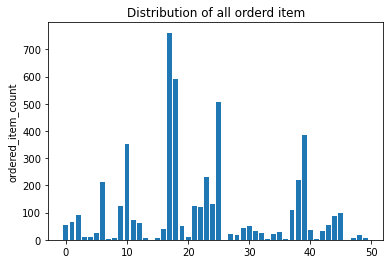

In [25]:
item_name_list= item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt=item_quantity.values.tolist()

plt.bar(x_pos,order_cnt,align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

In [27]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

### 한주문에 10달러 이상인 주문번호

In [51]:
chipo_ordered_group=chipo.groupby('order_id').head()
chipo_ordered_group

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [44]:
chipo_ordered_group=chipo.groupby('order_id').sum()
results=chipo_ordered_group[chipo_ordered_group.item_price >=10]
results

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [42]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


### 아이템별 가격 구하기

In [55]:
chipo_one_item = chipo[chipo.quantity ==1]
price_per_item=chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by="item_price",ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [56]:
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [57]:
price_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [58]:
item_name_list=price_per_item.index.tolist()
x_pos=np.arange(len(item_name_list))
item_price=price_per_item['item_price'].tolist()

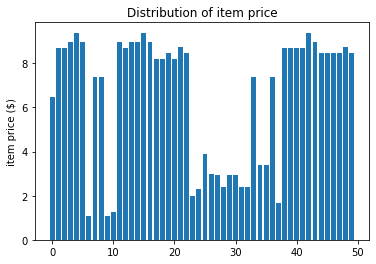

In [66]:
plt.bar(x_pos,item_price,align='center')
plt.ylabel('item price ($)')
plt.title('Distribution of item price')

plt.show()

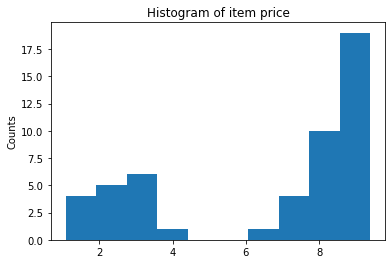

In [67]:
plt.hist(item_price)
plt.ylabel('Counts')
plt.title('Histogram of item price')

plt.show()

### 가장 비싼 주문에서 아이템이 얼마나 팔렸는지

#### 1등 205.25달러, 23개 아이템 

In [70]:
chipo.groupby('order_id').sum().sort_values(by='item_price',ascending=False)

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08


In [91]:
chipo_salad=chipo[chipo['item_name']=='Veggie Salad Bowl']
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


#### 한 주문에서 여러 번 주문하는 경우 중복제거

In [90]:
chipo_salad=chipo_salad.drop_duplicates(['item_name','order_id'])
chipo_salad 

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [76]:
#내가 생각한거
len(chipo[chipo['item_name']=='Veggie Salad Bowl'])

18

#### 'Chicken Bowl' 2개 이상 주문한 주문횟수 구하기

In [119]:
chipo_chicken=chipo[chipo['item_name']=='Chicken Bowl']
chipo_chicken_ordersum= chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result=chipo_chicken_ordersum[chipo_chicken_ordersum>=2]

len(chipo_chicken_result)

114

# 음주 데이터 실습

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
file_path = './Downloads/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [122]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [123]:
drinks.describe() # 기본 통계정보

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [124]:
corr1 = drinks[['beer_servings','wine_servings']].corr(method='pearson')
corr1

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [125]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr2 = drinks[cols].corr(method='pearson')
corr2

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


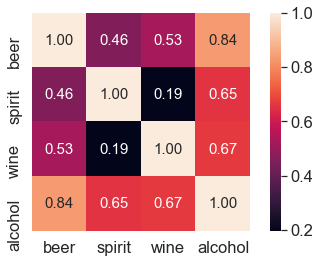

In [126]:
import seaborn as sns
cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr2.values,cbar = True,annot = True,square = True, fmt = '.2f',annot_kws = {'size':15},
yticklabels = cols_view, xticklabels = cols_view)
plt.tight_layout()
plt.show()

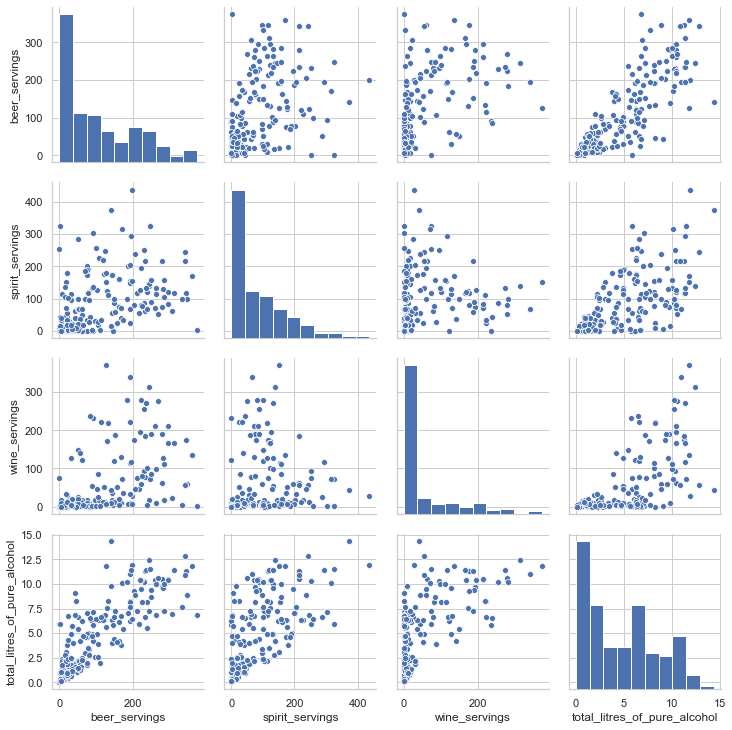

In [127]:
sns.set(style='whitegrid',context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']],height=2.5)
plt.show()

# matplotlib 한글깨짐 문제 해결하는 코드

In [135]:
import platform
from matplotlib import font_manager, rc
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System.....')

## 막대도표, 누적막대

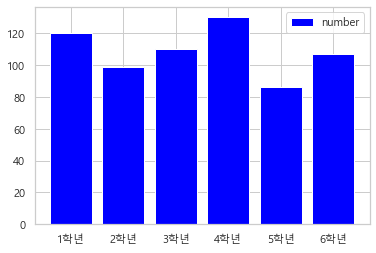

In [133]:
data = {'1학년':120,'2학년' :99,'3학년':110,'4학년':130,'5학년':86,'6학년':107}
d = pd.Series(data)
x_ = d.values
y_ = d.index
rects = plt.bar(y_, x_, color='blue',label='number')

plt.legend()
plt.show()

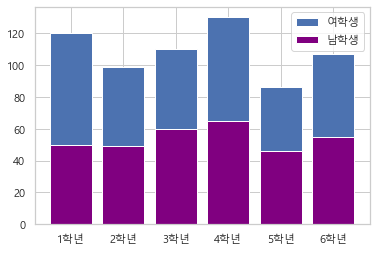

In [145]:
data = {'1학년':[120,70,50],'2학년' :[99,50,49],'3학년':[110,50,60],'4학년':[130,65,65],'5학년':[86,40,46],'6학년':[107,52,55]}
d = pd.DataFrame(data, index=['전체인원','여학생수','남학생수'])
x1_ = d.loc['전체인원'];x_f = d.loc['여학생수'];x_m=d.loc['남학생수'] #loc[] 행
y_ = d.columns

plt.bar(y_, x_f, color='b',bottom=x_m,label='여학생')
plt.bar(y_,x_m,color='purple',label='남학생')
plt.legend()
plt.show()

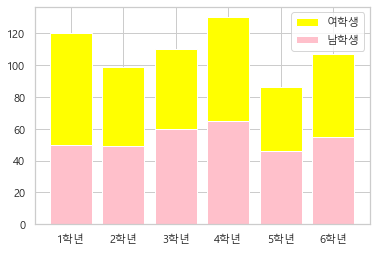

In [150]:
plt.bar(y_, x_f, color='yellow',bottom=x_m,label='여학생')
plt.bar(y_,x_m,color='pink',label='남학생')
plt.legend()
plt.show()

### (참고) 누적막대 사용법 : 여러 속성을 하나의 막대그래프에 넣고 싶을때 코드쓰는 법

In [142]:
plt.bar(ind,df2[t0] ,width, label='0')
plt.bar(ind,df2[t1] , width,bottom=df2[t0], label='1')
plt.bar(ind,df2[t2] , width,bottom=df2[t1]+df2[t0], label='2')
plt.bar(ind,df2[t3] ,width, bottom=df2[t2]+df2[t1]+df2[t0], label='3')
plt.bar(ind,df2[t4] ,width, bottom=df2[t3]+df2[t2]+df2[t1]+df2[t0], label='4')

## 파이차트

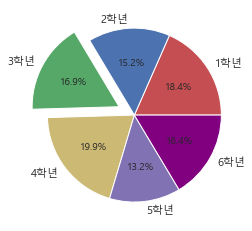

In [151]:
data = {'1학년':120,'2학년' :99,'3학년':110,'4학년':130,'5학년':86,'6학년':107,}
d = pd.Series(data)
x_ = d.values
y_ = d.index
color =['r','b','g','y','m','purple']

pie1 = plt.pie(x_, labels=y_, colors=color,explode=(0,0,0.2,0,0,0),autopct="%1.1f%%") #explode : 한조각 빠져나오게 하는 속성
plt.show()

# boxplot 상자그림

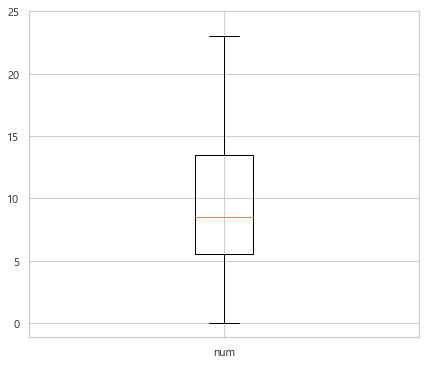

In [153]:
data = pd.Series([0,0,5,7,8,9,12,14,22,23])
plt.figure(figsize=(7,6))
boxplot = plt.boxplot([data.values],labels=['num'])
plt.yticks(np.arange(0,30,step=5))
plt.show()

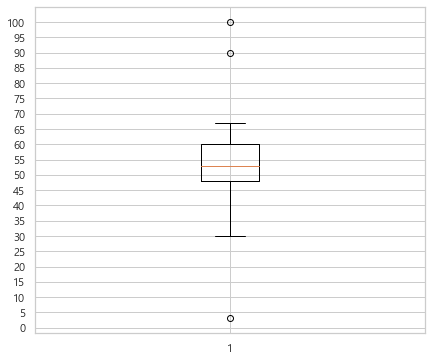

In [157]:
from scipy import stats

x = np.array([3,30,35,40,55,48,49,51,57,55,53,51,60,67,63,90,100])
df = pd.DataFrame(x,columns=['feature1'])
tresh = 1.5
df[(np.abs(stats.zscore(df))> tresh).all(axis=1)].values.ravel() #outlier 제거
np.percentile(df[(np.abs(stats.zscore(df))< tresh).all(axis=1)].values.ravel(),[0,25,50,75,100], interpolation='nearest')#최소,최대,백분위 수 출력

plt.figure(figsize=(7,6))
boxplot = plt.boxplot([x])
plt.yticks(np.arange(0,101,step=5))
plt.show()

# 통계
## statistics
- mean, geometric_mean, harmonic_mea,median, mode
- Pstdev,pvariance,stdev,variance

#### (참고)
    
- 차원 축소 : 5차원 중 몇개를 결합해 3차원으로 만드는 것
- 차원 선택 : 5개중 3개 차원만 선택하는 것


# 상관관계

- numpy:  np.corrcoef() 
- pandas: .corr(method=상관계수 종류)
- scipy

Pearsons correlation: 0.903
Spearmans correlation: 0.897


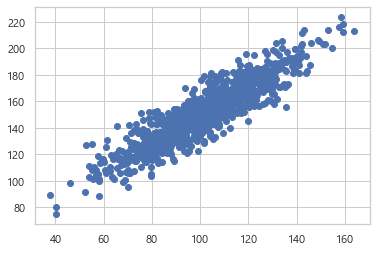

In [159]:
from numpy.random import randn
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# calculate Pearson's correlation
corr1, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr1)
# calculate spearman's correlation
corr2, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr2)

plt.scatter(data1,data2)
plt.show()